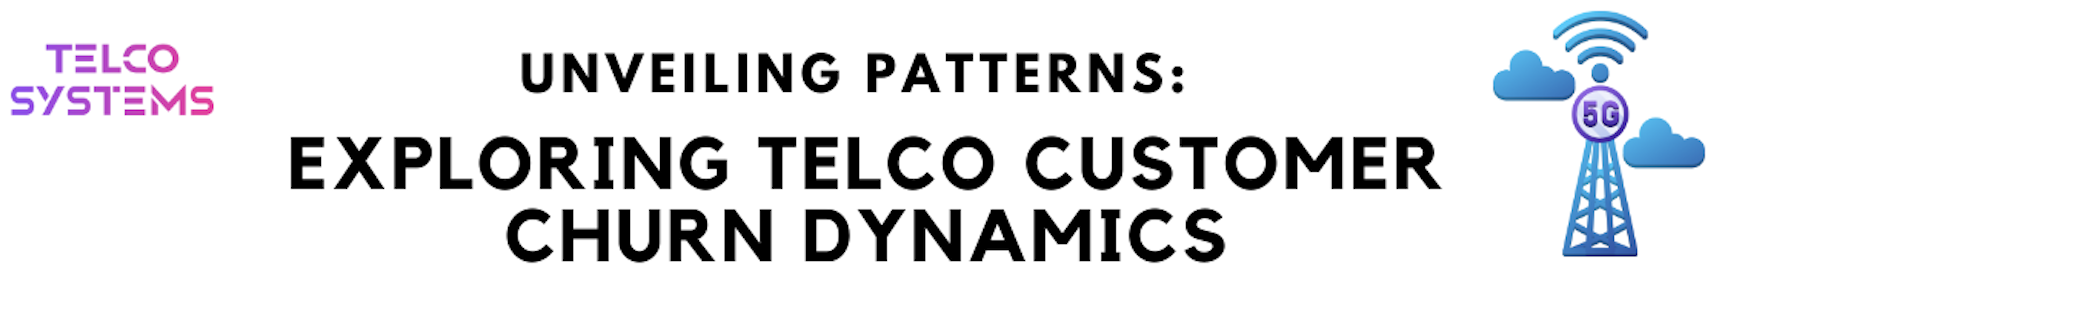

# Table of Contents

1. [Project Overview and Goal](#introduction)
2. [Data Acquisition and Preparation](#acquisition)
3. [Data Exploration](#exploration)
4. [Modeling](#modeling)
5. [Conclusion](#conclusion)

# 1. Project Overview and Goal <a name="introduction"></a>

#### - According to TechSee's report based on a 2019 survey result,39% of Americans canceled their telecom contracts due to unsatisfied customer service (TechSee Augmented Vision Ltd., 2022).

#### - Reactive retention strategies are shown to be ineffective, instead, proactive efforts are key.

#### - This project will invstigate why customers of Telco churn, with statistical analysis and model building.

#### - The goal is to develop a ML classification model in order to predict the churning pattern of a customer, and therefore implementing proactive measures to prevent the churning before it happens.


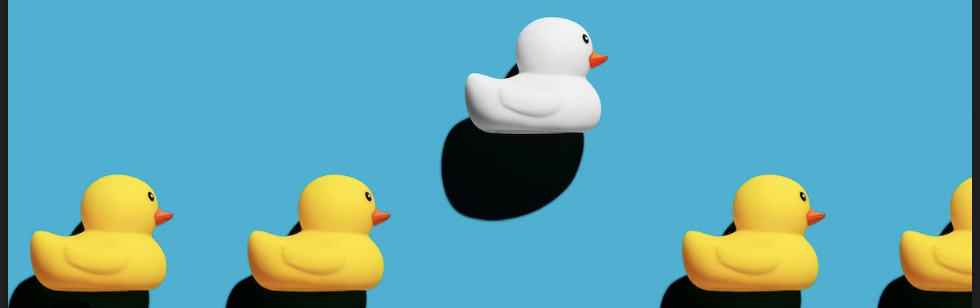

# 2. Data Acquisition and Preparation <a name="acquisition"></a>

#### - Data source is non-public; acquired from MySQL Codeup DB Server(Telco_churn Database) with credentials that are stored in env.py
#### - During preparation: 
> - removed duplicated columns
> - fill NaN values in internet_service_type column and churn_month column
> - fill the ' ' in total_charges column with 0 and convert it to float
> - drop the 3 id columns
> - split the dataset into train, validate and test for future modeling

In [1]:
import env # a .gitignore file with credentials
import acquire as a  # acquire.py is a file that stores a function "get_telco_data" to retrieve data from my local .csv file if it exists;
                    #if this file does not exist locally,it will run a pd.read_sql() function to retreive data from MySQL database
import prepare as p # preparation.py stores a function 'prep_telco ()' to clean up the dataset for further exploration
import warnings
warnings.filterwarnings("ignore") #ignore warnings

telco = a.get_telco_data() # In this case, there is a local telco_raw.csv file in my working directory, so it retrieves locally.             
telco = p.prep_telco(telco) # clean the dataset

train,validate,test = p.split(df = telco,target_variable = 'churn') #split the dataset

this file exists, reading from csv


In [50]:
train.payment_type.value_counts()

payment_type
Electronic check             1434
Mailed check                  935
Bank transfer (automatic)     935
Credit card (automatic)       921
Name: count, dtype: int64

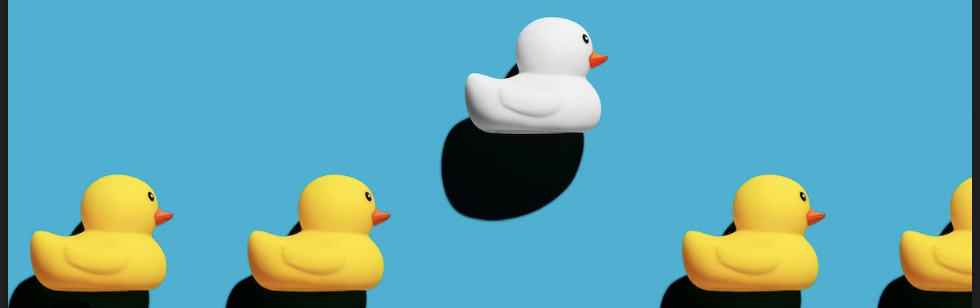

# 3. Data Exploration <a name="exploration"></a>
> - #### Proposed 5 questions
>> - How many customers have churned?
>> - How do monthly charges, total charges and tenure (continuous variables) affect churn?
>> - How are the categorical variables affect churn?
>> - Do people have higher tenure tend to have lower monthly charges?
> - #### Explored the continuous variables and categorical variables against churn in train dataset
> - #### Ran t-test,chi-square test and pearson's correlation on all independent variables for association
[Main takeaways](#takeaways)


### Question 1: How many customers have churned?

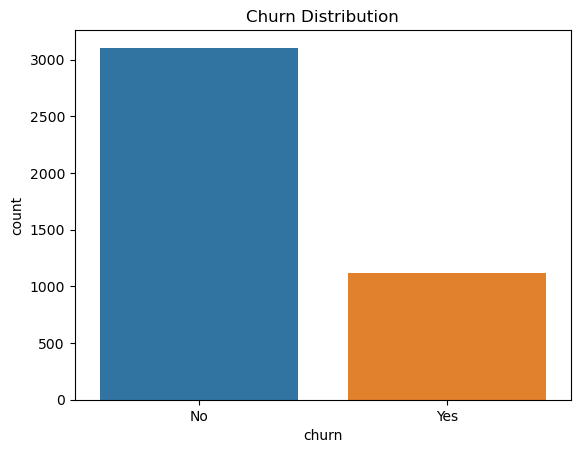

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='churn', data=train)
plt.title('Churn Distribution')
plt.show()

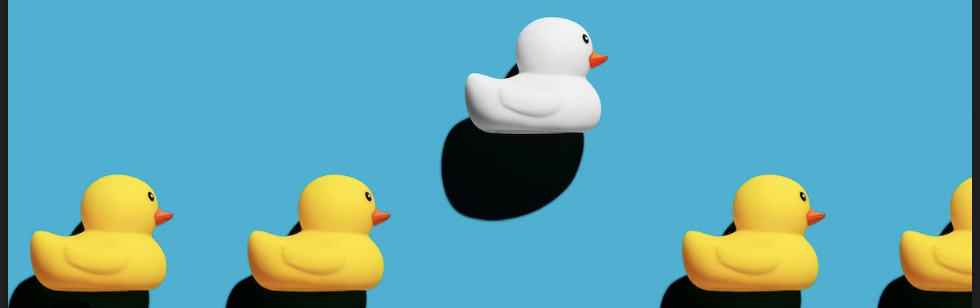

### Question  2: How do monthly charges, total charges and tenure (continuous variables) affect churn?
> - #### Split the train dataset by churn/not churn
> - #### Ran Pearson's correlation on monthly_charges/tenure/total_charges vs. churn

In [4]:
# split train dataset by churn/ not churn
churn = train[train.churn == 'Yes']
notchurn = train[train.churn != 'Yes']
len(churn) + len(notchurn) == len(train)

True

> ### Visualization

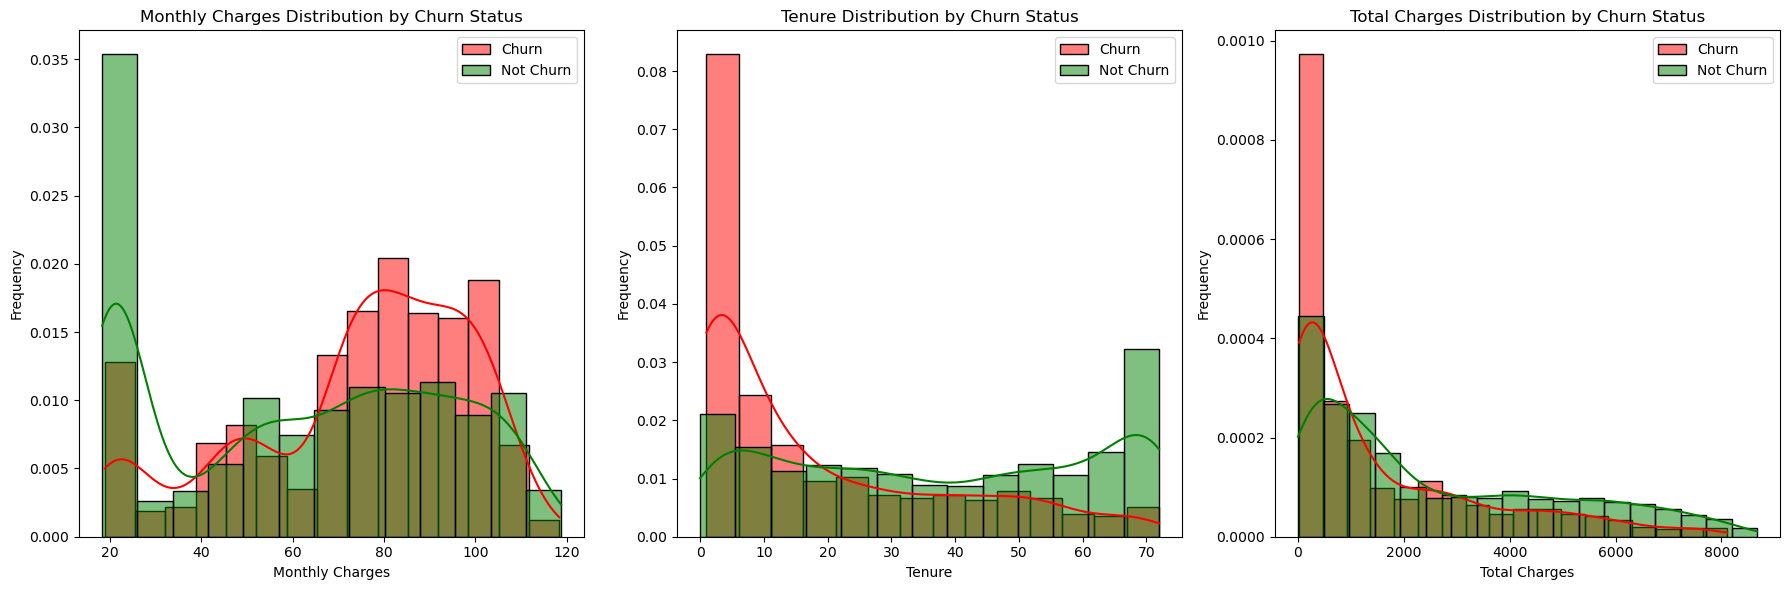

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'churn' and 'notchurn' are your DataFrames

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Monthly Charges
sns.histplot(churn['monthly_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[0])
sns.histplot(notchurn['monthly_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot Tenure
sns.histplot(churn['tenure'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[1])
sns.histplot(notchurn['tenure'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[1])
axes[1].set_title('Tenure Distribution by Churn Status')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot Total Charges
sns.histplot(churn['total_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[2])
sns.histplot(notchurn['total_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn Status')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


> ### From visulization:
>> - #### Customers that have churned tend to have higher monthly charges, lower tenure and lower total charges;
>> - #### Total charges do not seem to directly relate to churn status,as it is a result of monthly charges and tenure's multiplication. 

> # T-Test on 'monthly_charges','tenure' vs. 'churn','not churn'

In [6]:
from scipy import stats

In [7]:
# monthly charges on churn vs. monthly charges on not churn #

# 2-sample 1-tail T-test
Ho = 'monthly charges for churned customers are not higher than non-churned customers'
Ha = 'monthly charges for churned customers are higher than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.monthly_charges.var() == notchurn.monthly_charges.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(churn.monthly_charges, notchurn.monthly_charges, equal_var=False)
print(f'monthly_charges t = {t}, p = {p}')

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
monthly_charges t = 13.680795933518539, p = 3.902002806769788e-41
We reject the null hypothesis, with pvalue=3.902002806769788e-41, we conclude monthly charges for churned customers are higher than non-churned customers


In [8]:
# tenure on churn vs. tenure on not churn #

# 2-sample 1-tail T-test
Ho = 'tenure for churned customers are not lower than non-churned customers'
Ha = 'tenure for churned customers are lower than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.tenure.var() == notchurn.tenure.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(notchurn.tenure,churn.tenure,equal_var=False)
print(f'tenure t = {t}, p = {p}')

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
tenure t = 26.79629948967026, p = 1.3308231278358085e-138
We reject the null hypothesis, with pvalue=1.3308231278358085e-138, we conclude tenure for churned customers are lower than non-churned customers


> ### From statistical test:
>> - #### Tenure has a bigger positive t-value and smaller p-value compare to monthly charges, so tenure has bigger impact on churn than monthly_charges (This will be confirmed in decision tree later).
>> - #### The positive t-value indicates churn customers have bigger monthly charges and smaller tenure compared to unchurned customers (position of arguments)

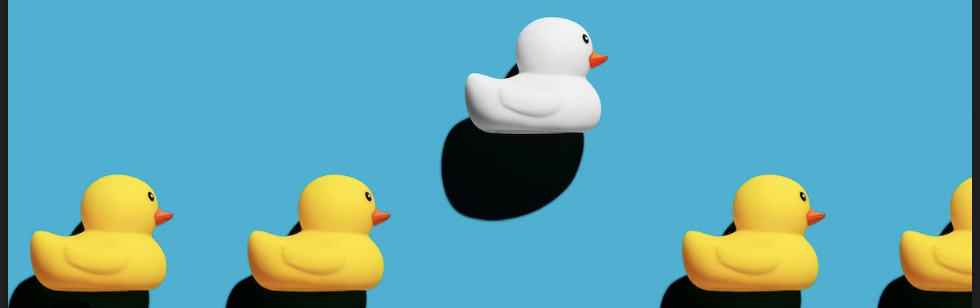


## Question 3: How are the categorical variables affect churn?
> ### - Ran histogram for all categorical variables
> ### - Dropped irrelavant columns 
> ### - Ran Chi-sqaure tests for the remaining variables


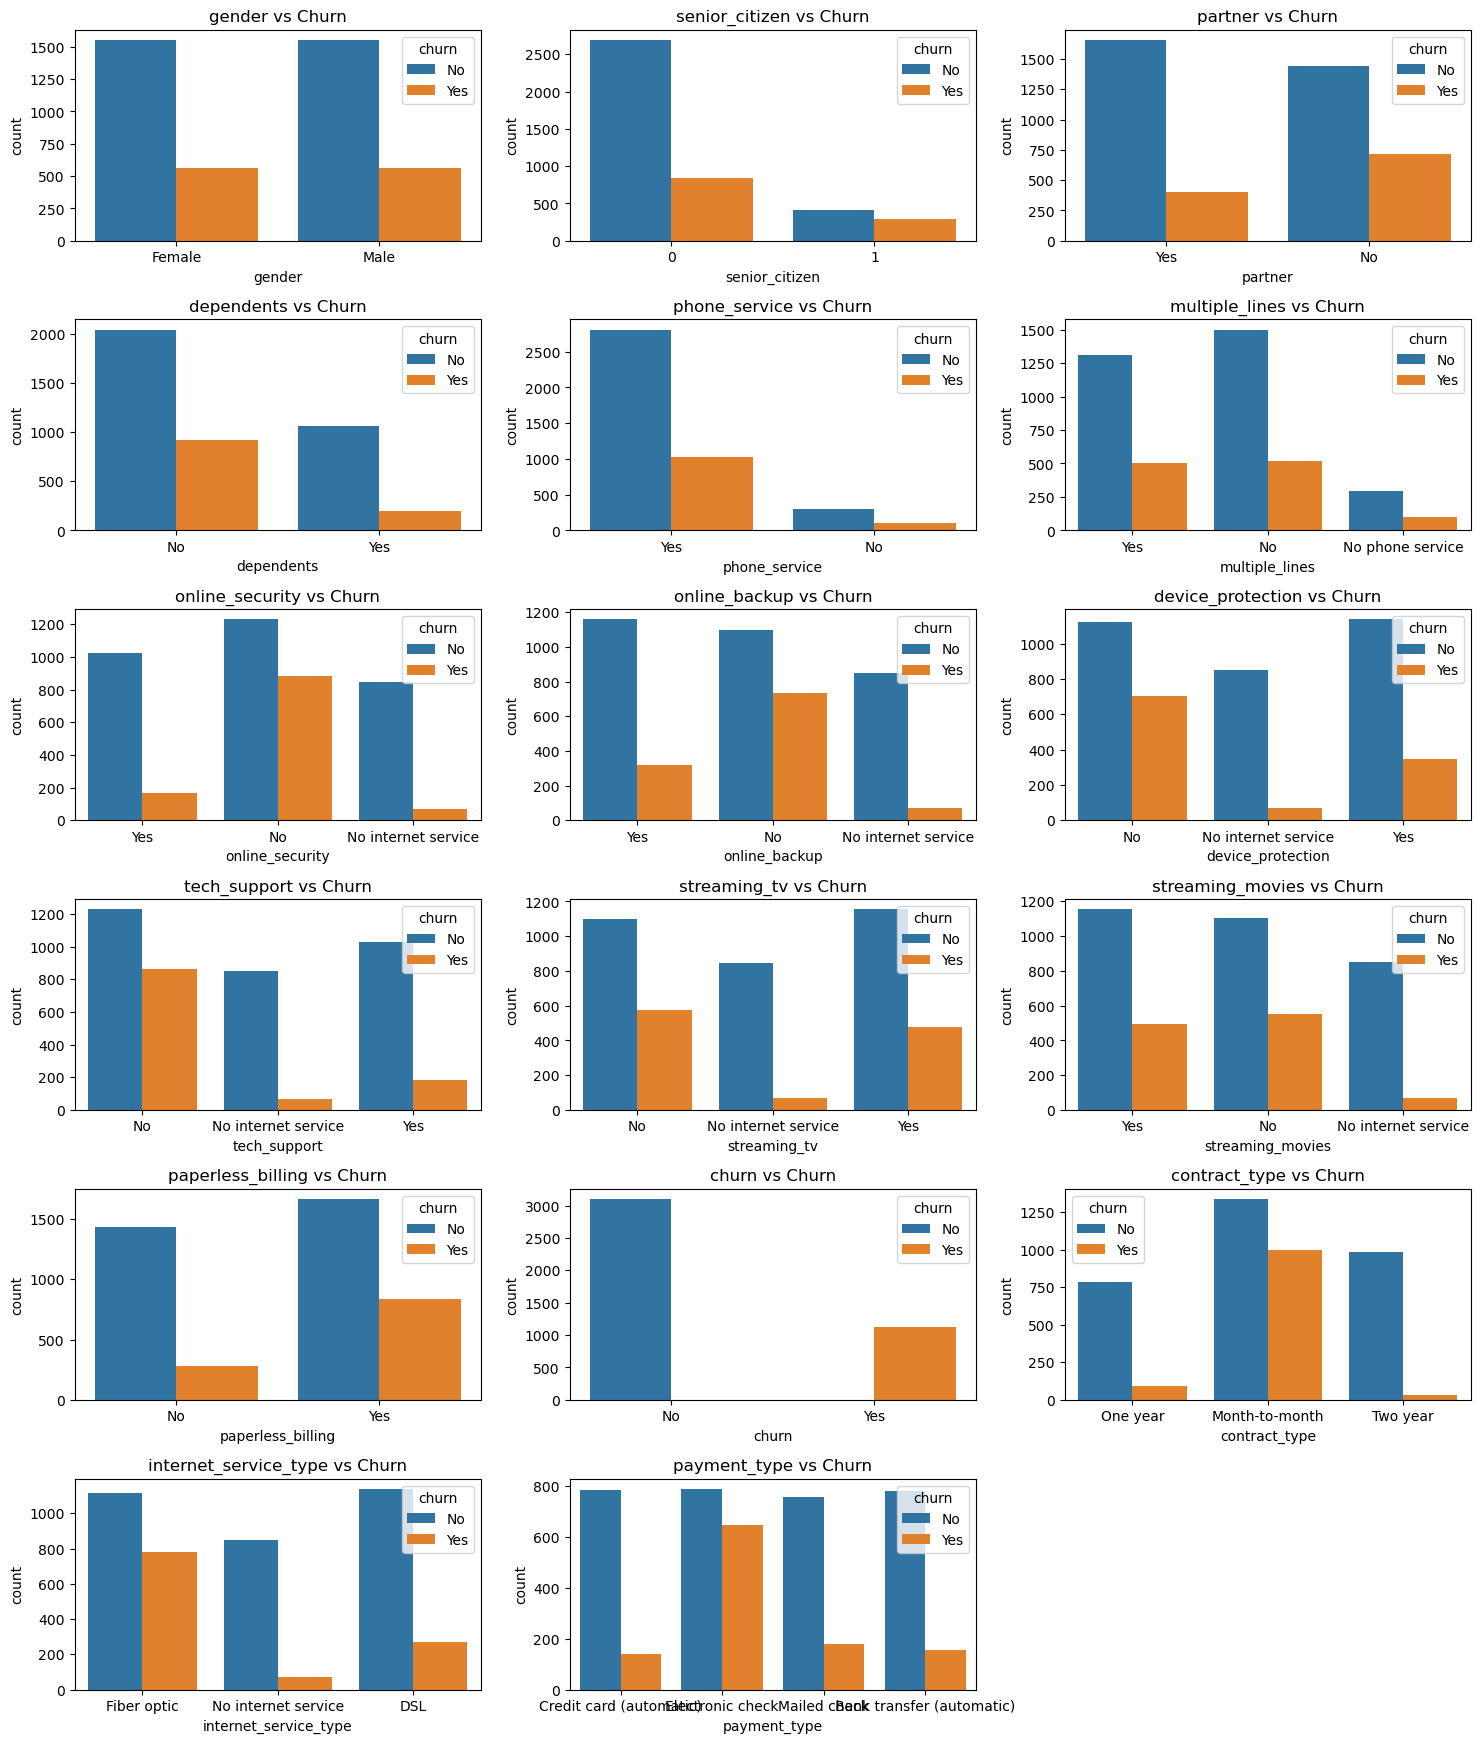

In [9]:
categorical_columns = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'contract_type', 'internet_service_type',
       'payment_type']
# fig means entire figure, axes is the array of subplots
fig, axes = plt.subplots(nrows=7, ncols=3, 
                         figsize=(15,20))

# Flatten the axes array
axes = axes.flatten()

# Plot each categorical column against churn
# i represents index, column represents columns
# enumerate in order to generate titles
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=train, ax=axes[i])
    axes[i].set_title(f'{column} vs Churn')

# Remove empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

> ### From visulization:
>> - #### Gender, phone_service and multiple_lines do not seem to have significant impacts on churning status
>> - #### Therefore will not include in the Chi-square test

> # Chi-Square Test

In [10]:
from scipy.stats import chi2_contingency
import pandas as pd
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train['churn'])

    # Perform chi-square test
    chi2, p,degf, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {column} against churn:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, "and churn.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between", column, "and churn.")

    print("\n" + "="*50 + "\n")

Chi-square test for gender against churn:
Chi2 statistic: 2.4733283637992e-05
P-value: 0.996031931504371
Fail to reject the null hypothesis. There is not enough evidence of association between gender and churn.


Chi-square test for senior_citizen against churn:
Chi2 statistic: 90.8791641507161
P-value: 1.5271938515844278e-21
Reject the null hypothesis. There is evidence of association between senior_citizen and churn.


Chi-square test for partner against churn:
Chi2 statistic: 97.15376877725984
P-value: 6.414706667955165e-23
Reject the null hypothesis. There is evidence of association between partner and churn.


Chi-square test for dependents against churn:
Chi2 statistic: 102.24217978518547
P-value: 4.91325418673439e-24
Reject the null hypothesis. There is evidence of association between dependents and churn.


Chi-square test for phone_service against churn:
Chi2 statistic: 0.36450167846667736
P-value: 0.5460166860258362
Fail to reject the null hypothesis. There is not enough evid

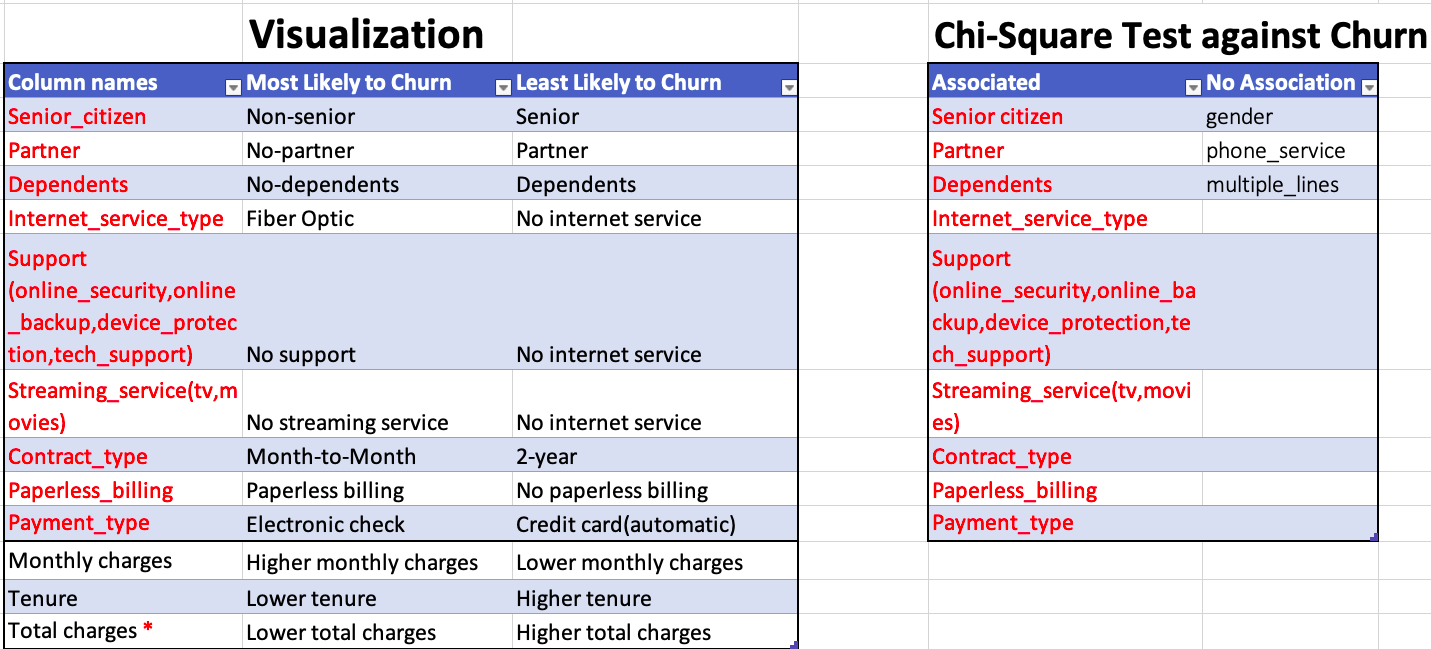

> ### From statistical test:
>> - #### No internet service customers are least likely to churn.
>> - ####  For customers that do have internet service, fiber optics (internet_service_type) tend to churn.
>> - #### Among all support options (online security, online backup, device protection, tech support), customers that opt No to support are most likely tend to churn.
>> - #### Customers that have month-to-month contract are most likely to churn, customers sign 2-year contract are least likely to churn
>> - #### Customers choose paperless biling are more likely to churn
>> - #### Customers choose electric check are more likely to churn.

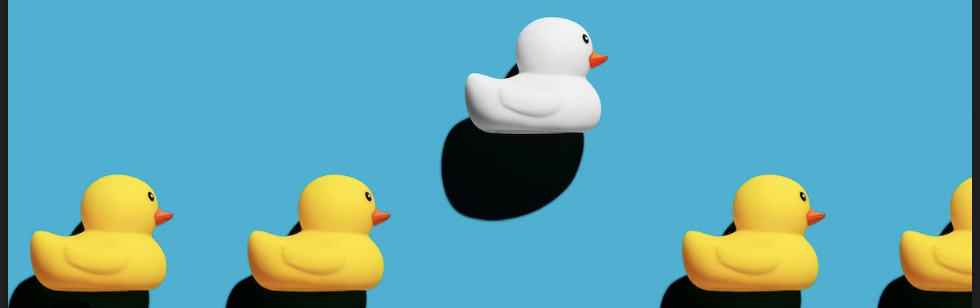

## Question 4: Do people have higher tenure tend to have lower monthly charges?
> ### - Ran scatterplot tenure vs. monthly charges
> ### - Ran Pearson's Correlation 

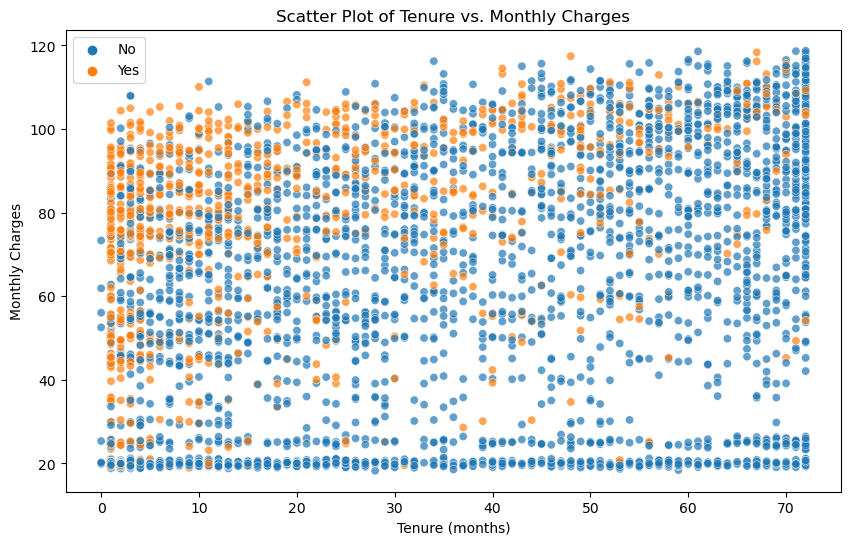

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='monthly_charges', data=train, hue='churn', alpha=0.7)
plt.title('Scatter Plot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend()
plt.show()

> ### From visulization:
>> - #### there is not significant differences in monthly charges with different tenures.


> ## Pearson's Correlation

In [12]:
# Define hypothesis
Ho = 'there is no correlation between tenure and monthly charges'
Ha = 'there is a correlation between tenure and monthly charges'
alpha = 0.05

#Pearson's correlation test
r,p = stats.pearsonr(train.tenure,train.monthly_charges)

if p < alpha:
    print(f'We reject the null hypothesis,{Ha}, with correlation coefficient of {r} and pvalue = {p}')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis,there is a correlation between tenure and monthly charges, with correlation coefficient of 0.23954758922224365 and pvalue = 3.2878472827609713e-56


> ### From Correlation test:
>> - #### The result shows that there is a weak positive correlation between the monthly charges and tenure, with a coefficient r of 0.24 and p-value of 3.29e-56

# Main Takeaways from Exploration  <a name="takeaways"></a>
### - Among continuous variables, tenure has the biggest impact on churning status; 
### - Gender, phone service, and multiple lines do not seem to have significant impacts on churn status ;
## - Churn: 
> ### - higher monthly charges, lower tenure;
> ### - fiber optics as Internet service type, Opt “No” to support options (online security, online back up, device protection, tech support), month-to-month contract, paperless billing, and electric check as payment.

## - Not churn:
> ### - lower monthly charges, higher tenure;
> ### - no Internet service, 2-year contract, no paperless billing and credit card as payment.




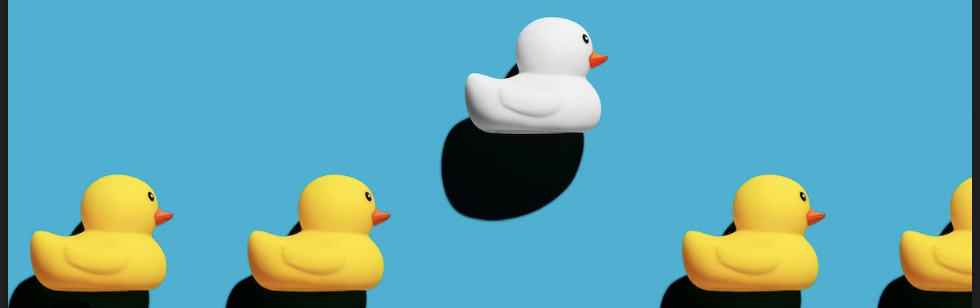

# 4. Modeling <a name="modeling"></a>

> ## - Encoded all columns 
> ## - 'gender','phone_service' and 'multiple_lines' columns are dropped due to their lack of association with churn status,as proven from the previous chi-square tests.
> ## - Used decision tree, random forest and knn for modeling

In [13]:
# dropping irrelavant columns proven from previous chi-square tests
train = train.drop(columns = ['gender','phone_service','multiple_lines'])
validate = validate.drop(columns = ['gender','phone_service','multiple_lines'])
test = test.drop(columns = ['gender','phone_service','multiple_lines'])

# senior_citizen, monthly_charges, total_charges,tenure columns are not included
new_cat_col = train.select_dtypes(include='O').columns
new_cat_col

import pandas as pd

#encode training dataset 
dummy_train = pd.get_dummies(train[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_train = pd.concat([train,dummy_train],axis=1)
encoded_train = encoded_train.drop(columns=new_cat_col)

#encode the validate dataset
dummy_val = pd.get_dummies(validate[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_val = pd.concat([validate,dummy_val],axis=1)
encoded_val = encoded_val.drop(columns=new_cat_col)

#encode the test dataset
#encode the validate dataset
dummy_test = pd.get_dummies(test[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_test = pd.concat([test,dummy_test],axis=1)
encoded_test = encoded_test.drop(columns=new_cat_col)

> ## Baseline accuracy

In [14]:
# Set baseline accuracy
encoded_train.churn_Yes.value_counts(normalize=True)

churn_Yes
0    0.734675
1    0.265325
Name: proportion, dtype: float64

In [15]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = encoded_train.drop(columns=['churn_Yes'])
y_train = encoded_train.churn_Yes

X_val = encoded_val.drop(columns=['churn_Yes'])
y_val = encoded_val.churn_Yes

X_test = encoded_test.drop(columns=['churn_Yes'])
y_test = encoded_test.churn_Yes


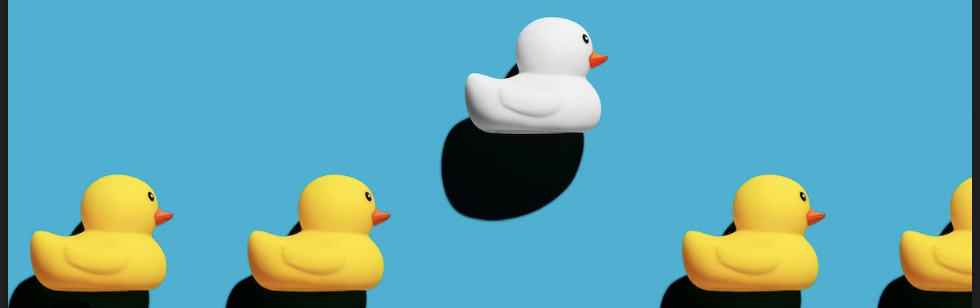

> ## Decision Tree


In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for depth in range(1, 21):
    # Create a decision tree model with the current hyperparameter value
    clf = DecisionTreeClassifier(max_depth=depth,random_state=123)

    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Get the accuracy score
    score_train = clf.score(X_train, y_train)
    score_val = clf.score(X_val, y_val)

    # Append the results to the list
    results.append({'Max Depth': depth, 
                    'Train_Accuracy': round(score_train, 4),
                    'Validate_Accuracy': round(score_val,4),
                   'Difference':abs(score_train - score_val) })

# Convert the list of dictionaries to a DataFrame
decision_tree_accuracy = pd.DataFrame(results)

print(decision_tree_accuracy.sort_values(by=['Difference','Validate_Accuracy'],ascending=[True,False]))


    Max Depth  Train_Accuracy  Validate_Accuracy  Difference
1           2          0.7837             0.7878    0.004124
2           3          0.7837             0.7878    0.004124
4           5          0.8024             0.7928    0.009606
0           1          0.7359             0.7253    0.010521
3           4          0.7927             0.7771    0.015516
5           6          0.8107             0.7878    0.022858
6           7          0.8263             0.7864    0.039899
7           8          0.8388             0.7871    0.051734
8           9          0.8549             0.7828    0.072087
9          10          0.8793             0.7637    0.115628
10         11          0.8956             0.7559    0.139766
11         12          0.9150             0.7459    0.169110
12         13          0.9321             0.7480    0.184023
13         14          0.9467             0.7424    0.204375
14         15          0.9605             0.7367    0.223781
15         16          0

In [37]:
best_decision_tree = decision_tree_accuracy.iloc[2,:]
best_decision_tree 

Max Depth            3.000000
Train_Accuracy       0.783700
Validate_Accuracy    0.787800
Difference           0.004124
Name: 2, dtype: float64

>> ## Decision Tree Visualization 

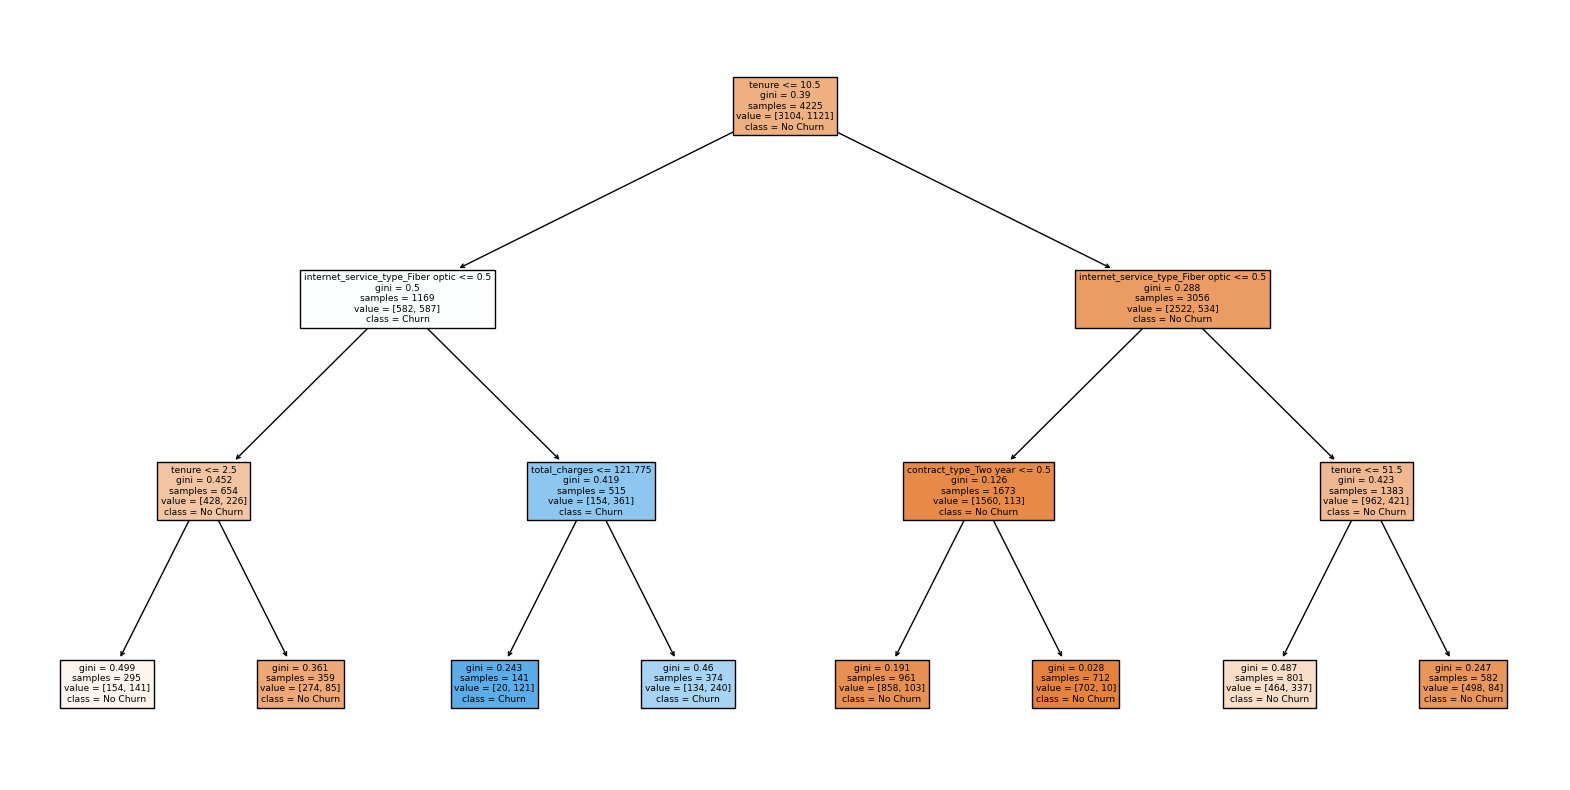

In [23]:
clf = DecisionTreeClassifier(max_depth=3,random_state=123)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"]) #filled=True means to fill the box with colors
plt.show()

> ## Decision Tree Findings:
>> ### - Models with max depth of 2 and 3 have the same accuracy results both on training and validate datasets. Model with max depth of 3 is considered to be the best model in decision tree algorithm
>> ### - According to the decision tree, tenure <= 10.5 is the most important cutoff point for determing churning status(this reaffirms previous finding from t-test), followed by internet_service_type "Fiber optic". 

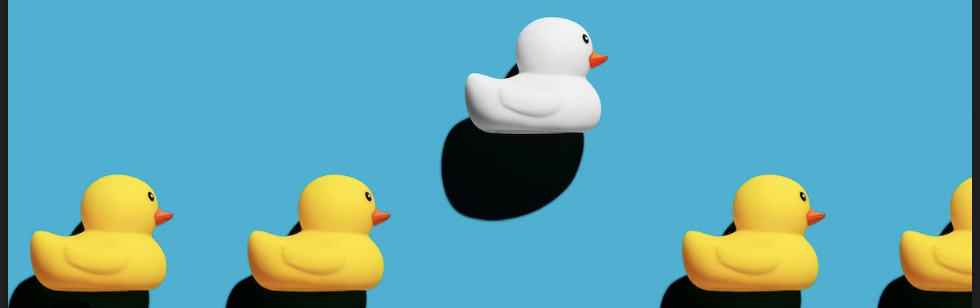

> # Random Forest


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Define hyperparameters
ntrees = (100,300,500,700,900,1100)
depth = (2,3,4,5,6,7,8,9,10) # 1 didn't pass the baseline accuracy

# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for n in ntrees:
    for i in depth:
        # Create a random forest model with the current hyperparameter values
        rf = RandomForestClassifier(n_estimators=n, max_depth=i, random_state=123)

        # Fit the model on the training data
        rf.fit(X_train, y_train)

        # Get the accuracy score
        score_train = rf.score(X_train, y_train)
        score_val = rf.score(X_val, y_val)

        # Append the results to the list
        results.append({'Number of Trees': n,
                        'Max Depth': i,
                        'Train Accuracy': round(score_train, 4),
                        'Validate Accuracy': round(score_val, 4),
                        'Difference': abs(score_train - score_val)})

# Convert the list of dictionaries to a DataFrame
random_forest_accuracy = pd.DataFrame(results)

print(random_forest_accuracy.sort_values(by=['Difference', 'Validate Accuracy'], ascending=[True, False]))


    Number of Trees  Max Depth  Train Accuracy  Validate Accuracy  Difference
2               100          4          0.7950             0.7949    0.000140
20              500          4          0.7969             0.7977    0.000806
38              900          4          0.7962             0.7984    0.002226
47             1100          4          0.7967             0.7991    0.002462
29              700          4          0.7969             0.7999    0.002935
11              300          4          0.7960             0.7921    0.003925
39              900          5          0.8021             0.7977    0.004401
30              700          5          0.8031             0.7984    0.004638
3               100          5          0.8019             0.7970    0.004874
48             1100          5          0.8033             0.7984    0.004875
10              300          3          0.7858             0.7807    0.005103
46             1100          3          0.7872             0.782

In [31]:
best_random_forest = random_forest_accuracy.iloc[29,:]
best_random_forest

Number of Trees      700.000000
Max Depth              4.000000
Train Accuracy         0.796900
Validate Accuracy      0.799900
Difference             0.002935
Name: 29, dtype: float64

> ## Random Forest findings:
>> ### the model with 700 trees of depth 4 has high accuracy and little model variances,therefore chosen as the best model.

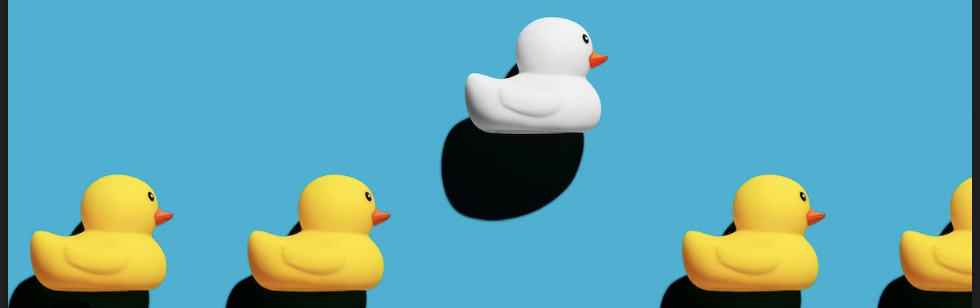

> ## K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for neighbors in range(1, 21):
       for weights in ['uniform', 'distance'] :
            
    # Create a decision tree model with the current hyperparameter value
        knn = KNeighborsClassifier(n_neighbors=neighbors,weights=weights)

    # Fit the model on the training data
        knn.fit(X_train, y_train)
    
    # Get the accuracy score
        score_train = knn.score(X_train, y_train)
        score_val = knn.score(X_val, y_val)

    # Append the results to the list
        results.append({'Weights': weights, 
                    'Number of Neighbors': neighbors,
                    'Train_Accuracy': round(score_train, 4),
                    'Validate_Accuracy': round(score_val,4),
                   'Difference':abs(score_train - score_val) })

# Convert the list of dictionaries to a DataFrame
knn_accuracy = pd.DataFrame(results)

print(knn_accuracy.sort_values(by=['Difference','Validate_Accuracy'],ascending=[True,False]))

     Weights  Number of Neighbors  Train_Accuracy  Validate_Accuracy  \
38   uniform                   20          0.7983             0.7857   
30   uniform                   16          0.8036             0.7906   
34   uniform                   18          0.8007             0.7871   
32   uniform                   17          0.8066             0.7913   
24   uniform                   13          0.8038             0.7878   
36   uniform                   19          0.8043             0.7878   
26   uniform                   14          0.8059             0.7871   
28   uniform                   15          0.8066             0.7857   
22   uniform                   12          0.8069             0.7850   
18   uniform                   10          0.8076             0.7850   
20   uniform                   11          0.8104             0.7821   
16   uniform                    9          0.8156             0.7814   
14   uniform                    8          0.8151             0.

In [34]:
best_knn = knn_accuracy.iloc[30,:]
best_knn

Weights                 uniform
Number of Neighbors          16
Train_Accuracy           0.8036
Validate_Accuracy        0.7906
Difference             0.012919
Name: 30, dtype: object

> ## KNN findings:
>> ### The model with uniform weights and 16 neighbors is chosen to be the best knn model due to its high accuracy and low model variances

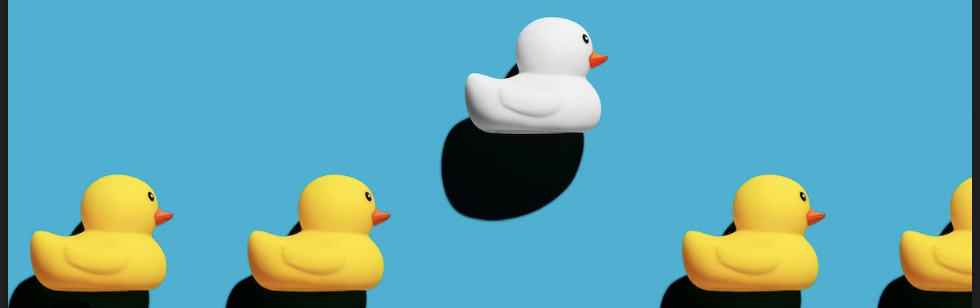

> # Best Model from 3 Algorithms:

In [38]:
print(best_decision_tree)
print()
print(best_random_forest)
print()
print(best_knn)

Max Depth            3.000000
Train_Accuracy       0.783700
Validate_Accuracy    0.787800
Difference           0.004124
Name: 2, dtype: float64

Number of Trees      700.000000
Max Depth              4.000000
Train Accuracy         0.796900
Validate Accuracy      0.799900
Difference             0.002935
Name: 29, dtype: float64

Weights                 uniform
Number of Neighbors          16
Train_Accuracy           0.8036
Validate_Accuracy        0.7906
Difference             0.012919
Name: 30, dtype: object


> ## Conclusion
> > ## Random Forest model with n_estimators = 700  and  max_depth = 4 is chosen to be the best mode

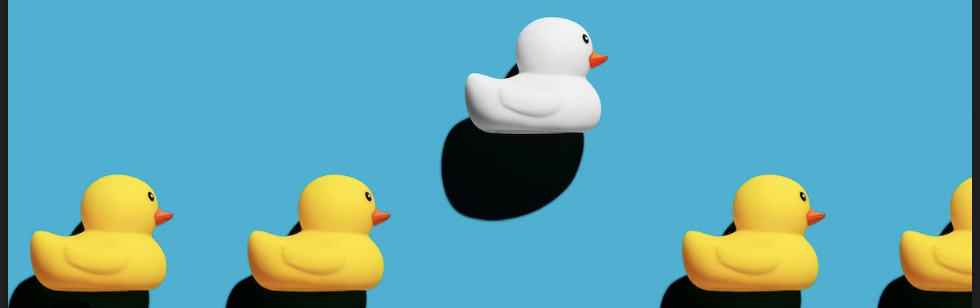

> # Model Testing <a name="testing"></a>

In [39]:
best_model_rf = RandomForestClassifier(n_estimators=700, max_depth=4)
best_model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=700)

In [42]:
print('Train Score')
print(best_model_rf.score(X_train,y_train))
print('Validate Score')
print(best_model_rf.score(X_val,y_val))
print('Test Score')
print(best_model_rf.score(X_test, y_test))

Train Score
0.7945562130177515
Validate Score
0.7970191625266146
Test Score
0.7906316536550745


> #  Visualization

In [43]:
# The predicted values of test dataset with the best model
y_pred_test = best_model_rf.predict(X_test)

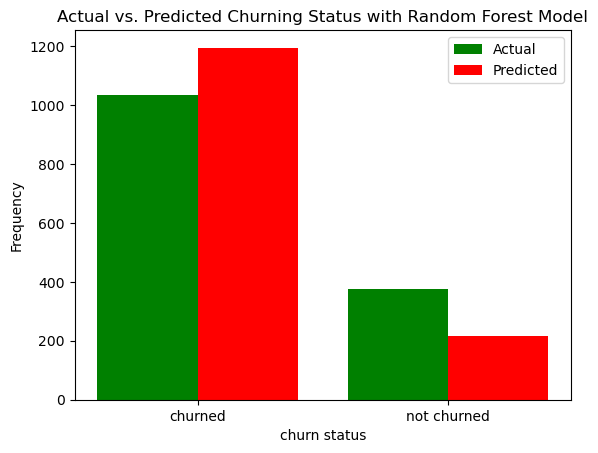

In [44]:
data = [y_test, y_pred_test]

# Create a histogram
plt.hist(data, bins=[-0.5, 0.5, 1.5], color=['green', 'red'], label=['Actual', 'Predicted'])

plt.xlabel('churn status')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Churning Status with Random Forest Model')
plt.xticks([0, 1], ['churned', 'not churned'])
plt.legend()
plt.show()

> ## Findings: 
> > ### From the visualization, we can infer that the model is more conservative compared to reality.

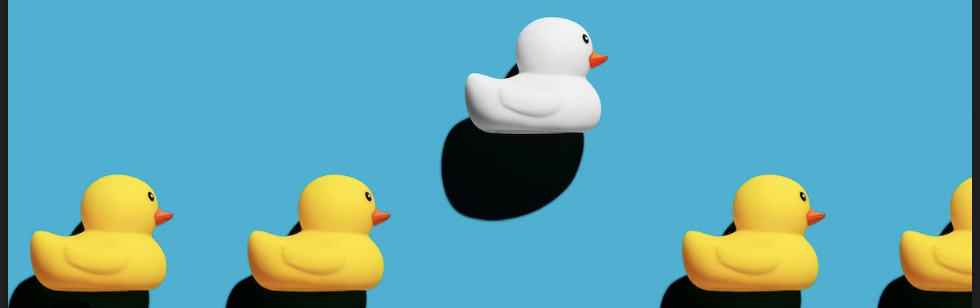

# 5. Conclusion <a name="conclusion"></a>
> ## Key findings:
>> ### - Random forest model(n_estimators=700, max_depth=4) is chosen to be the best model, with 79% accuracy
>> ### - The chosen model is conservative on prediction compared to actual values
>> ### - No churn: lower monthly charges, higher tenure, no Internet service, 2-year contract, no paperless billing and credit card payment 

> ## Recommendations:
>> ### - encourage 2-year contract, no papperless billing and credit card auto payment through various stimulations
>> ### - lower monthly charges

> ## Next Steps:
>> ### - To quantify how much each controllable factor can affect churning status, especially on internet service

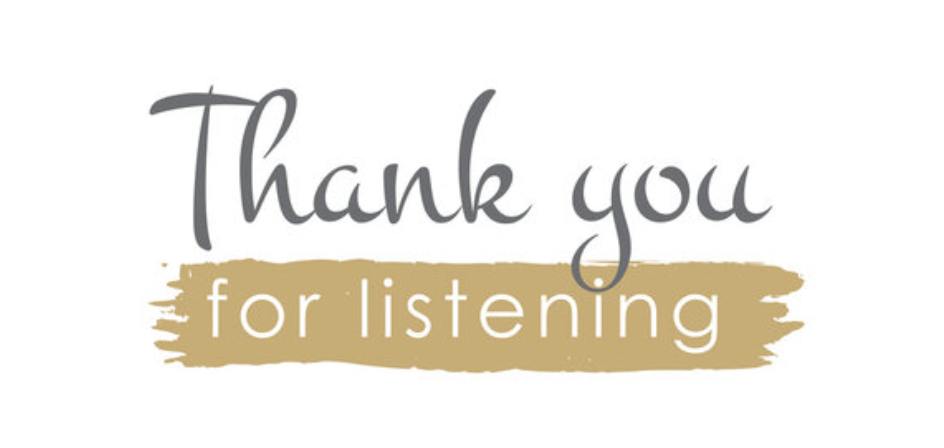

# References: 
    
TechSee Augmented Vision Ltd. (2022, December 31). Reasons for customer churn in Telecoms [Survey Results] | TechSee. TechSee. https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in%20telecoms&text=Customers%20canceled%20their%20contracts%20for,or%20had%20a%20negative%20approach)